In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

 Model trained successfully.

Test accuracy: 100.00%
Classification report:
              precision    recall  f1-score   support

     Healthy       1.00      1.00      1.00        11
Pathological       1.00      1.00      1.00        11

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



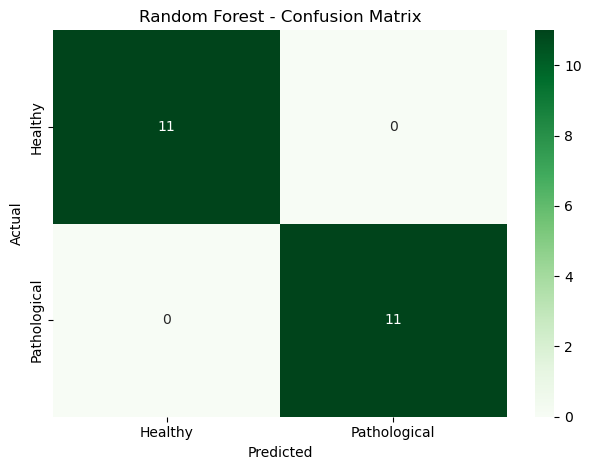

In [11]:
# Load EMG dataset (includes both original and augmented signals)
df = pd.read_csv("emg_dataset_entrainement.csv")

# Feature selection and label encoding
X = df[["SE_RF", "SE_BF", "SE_VM", "SE_ST", "MF_ST"]]
y = df["label"].map({"N": 0, "A": 1})  # 0 = healthy, 1 = pathological

# Split the data (stratified to keep class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print(" Model trained successfully.")

# Predict on test data and evaluate performance
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest accuracy: {accuracy:.2%}")
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=["Healthy", "Pathological"]))

# Confusion matrix to visualize
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=["Healthy", "Pathological"],
            yticklabels=["Healthy", "Pathological"])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()



/var/folders/9p/p1zb15ys0ksclq5zcyhbsv880000gp/T/ipykernel_94316/143404336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=forest_importance.values, y=forest_importance.index, palette="Reds_r")


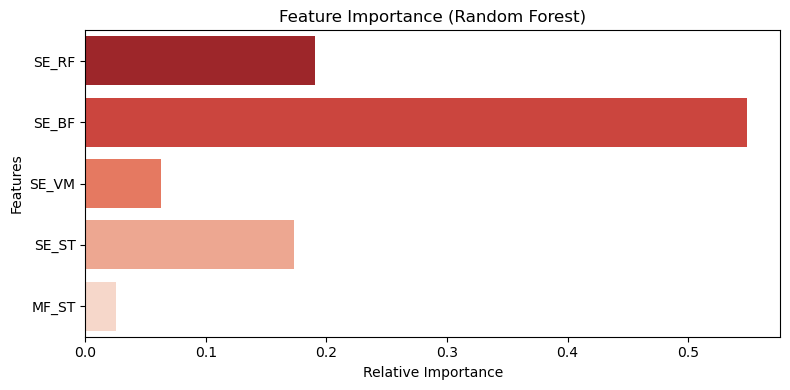

In [10]:
# Feature importance visualization
importances = rf_model.feature_importances_
feature_names = X.columns
forest_importance = pd.Series(importances, index=feature_names)

plt.figure(figsize=(8, 4))
sns.barplot(x=forest_importance.values, y=forest_importance.index, palette="Reds_r")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Relative Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()